## Global

Ce fichier a pour objectif de visualiser de manière globale les différents mésures effectuées sur le EEE afin de rechercher des patterns dans nos données. Pour ce faire nous avons utilisé des graphiques matplolib et seaborn.
Cependant les différents graphiques obtenus ne font ressortir aucun pattern particulier.

## I- Data Cleaning 
le but de cette section est le prétraitement des données et leur nettoyage afin qu'elles puissent être exploitables convenablement.

In [14]:
#importing pandas as pd

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

'''
# Read and store content
# of an excel file 
read_file = pd.read_excel ("data/Rejetinvasivesbilan2021-2022.xlsx")
  
# Write the dataframe object
# into csv file
read_file.to_csv ("Rejetinvasivebilan2021-2022.csv", index=True ,
                  header=True)
''' 

# read all the sheet of the file Rejetinvasivesbilan2021-2022.xlsx and convert 
# into an array of dataframe object
data1 = pd.read_excel("./data/data_brut/Rejetinvasivesbilan2021-2022.xlsx", sheet_name = None)

#For each sheet, create a csv file which contains the data
data1['Mimosa'].to_csv ("./data/data_csv/MimosaBilan.csv", index=False ,
                  header=True)

data1['Canne'].to_csv ("./data/data_csv/CanneBilan.csv", index=False ,
                  header=True)

data1['Ailante'].to_csv ("./data/data_csv/AilanteBilan.csv", index=False ,
                  header=True)


data1['Résumé'].to_csv ("./data/data_csv/Resume.csv", index=False ,
                  header=True)


# loading data into different dataframes 
df = pd.DataFrame(pd.read_csv(".\data\data_csv\AilanteBilan.csv"))
df1 = pd.DataFrame(pd.read_csv(".\data\data_csv\CanneBilan.csv"))
df2 = pd.DataFrame(pd.read_csv(".\data\data_csv\MimosaBilan.csv"))


# Show dataframe information
df.info()

#Afficher la liste des colonnes du dataframe
print(df.columns.tolist())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 8 columns):
Date              176 non-null object
Station           176 non-null object
Traitement        176 non-null object
Réplicat          176 non-null object
Hauteur           148 non-null float64
Nb feuilles       148 non-null float64
Nombre            176 non-null int64
Nombre rameaux    0 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 11.1+ KB
['Date', 'Station', 'Traitement', 'Réplicat', 'Hauteur', 'Nb feuilles', 'Nombre', 'Nombre rameaux']


###### Removal of NaN and creation of the global dataframe

In [15]:
# Delete empty data (NaN) in our dataframes

df = df.drop(['Nombre rameaux'], axis = 1)
df = df.dropna(subset=['Hauteur', 'Nb feuilles','Nombre'])

df1 = df1.drop(['Nombre rameaux'], axis = 1)
df1 = df1.dropna(subset=['Hauteur', 'Nb feuilles','Nombre'])

df2 = df2.drop(['Nombre rameaux','Nombre nœuds'], axis = 1)
df2 = df2.dropna(subset=['Hauteur', 'Nb feuilles','Nombre'])

# Concatenate the dataframes below to create a global dataframe that
# Contains the measures relating to the three EEE (Mimosa, Canne and Ailante)
df = pd.concat([df,df1], ignore_index = True)
df = pd.concat([df,df2], ignore_index = True)
# print(df.isna().sum())



'''
print(df.describe())
# Check for null values
df.isna().sum()
# Replacing null values by the mean of the column
#df.fillna(df.mean(),inplace = True)
'''
# Write the global dataframe object
# into csv file
df.to_csv("invasivesglobal.csv", index=False ,
                  header=True)

# show the global dataframe
print(data1['Résumé'].head(10))


      Date Station Traitement Compost Réplicat  Nombre  Moyenne Hauteur  \
0  06.2021      1M        NA1    Sans        A      12        15.583333   
1  06.2021      1M        NA1    Sans        B       9        16.444444   
2  06.2021      1M        NA1    Sans        C       7        15.000000   
3  06.2021      1M    NA1+Sol    Avec        A       4        21.875000   
4  06.2021      1M    NA1+Sol    Avec        B       0              NaN   
5  06.2021      1M    NA1+Sol    Avec        C       0              NaN   
6  06.2021      1M        NA2    Sans        A       4        28.100000   
7  06.2021      1M        NA2    Sans        B       6        33.333333   
8  06.2021      1M        NA2    Sans        C       2        47.000000   
9  06.2021      1M    NA2+Sol    Avec        A       4        24.000000   

   Moyenne Nf  Ecart-type Hauteur  Ecart-type Nf  
0   48.583333            9.119991      35.752834  
1   42.555556            7.699206      21.313793  
2   38.571429        

C:\Users\Durel\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
C:\Users\Durel\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


## II- data Visualization

#####

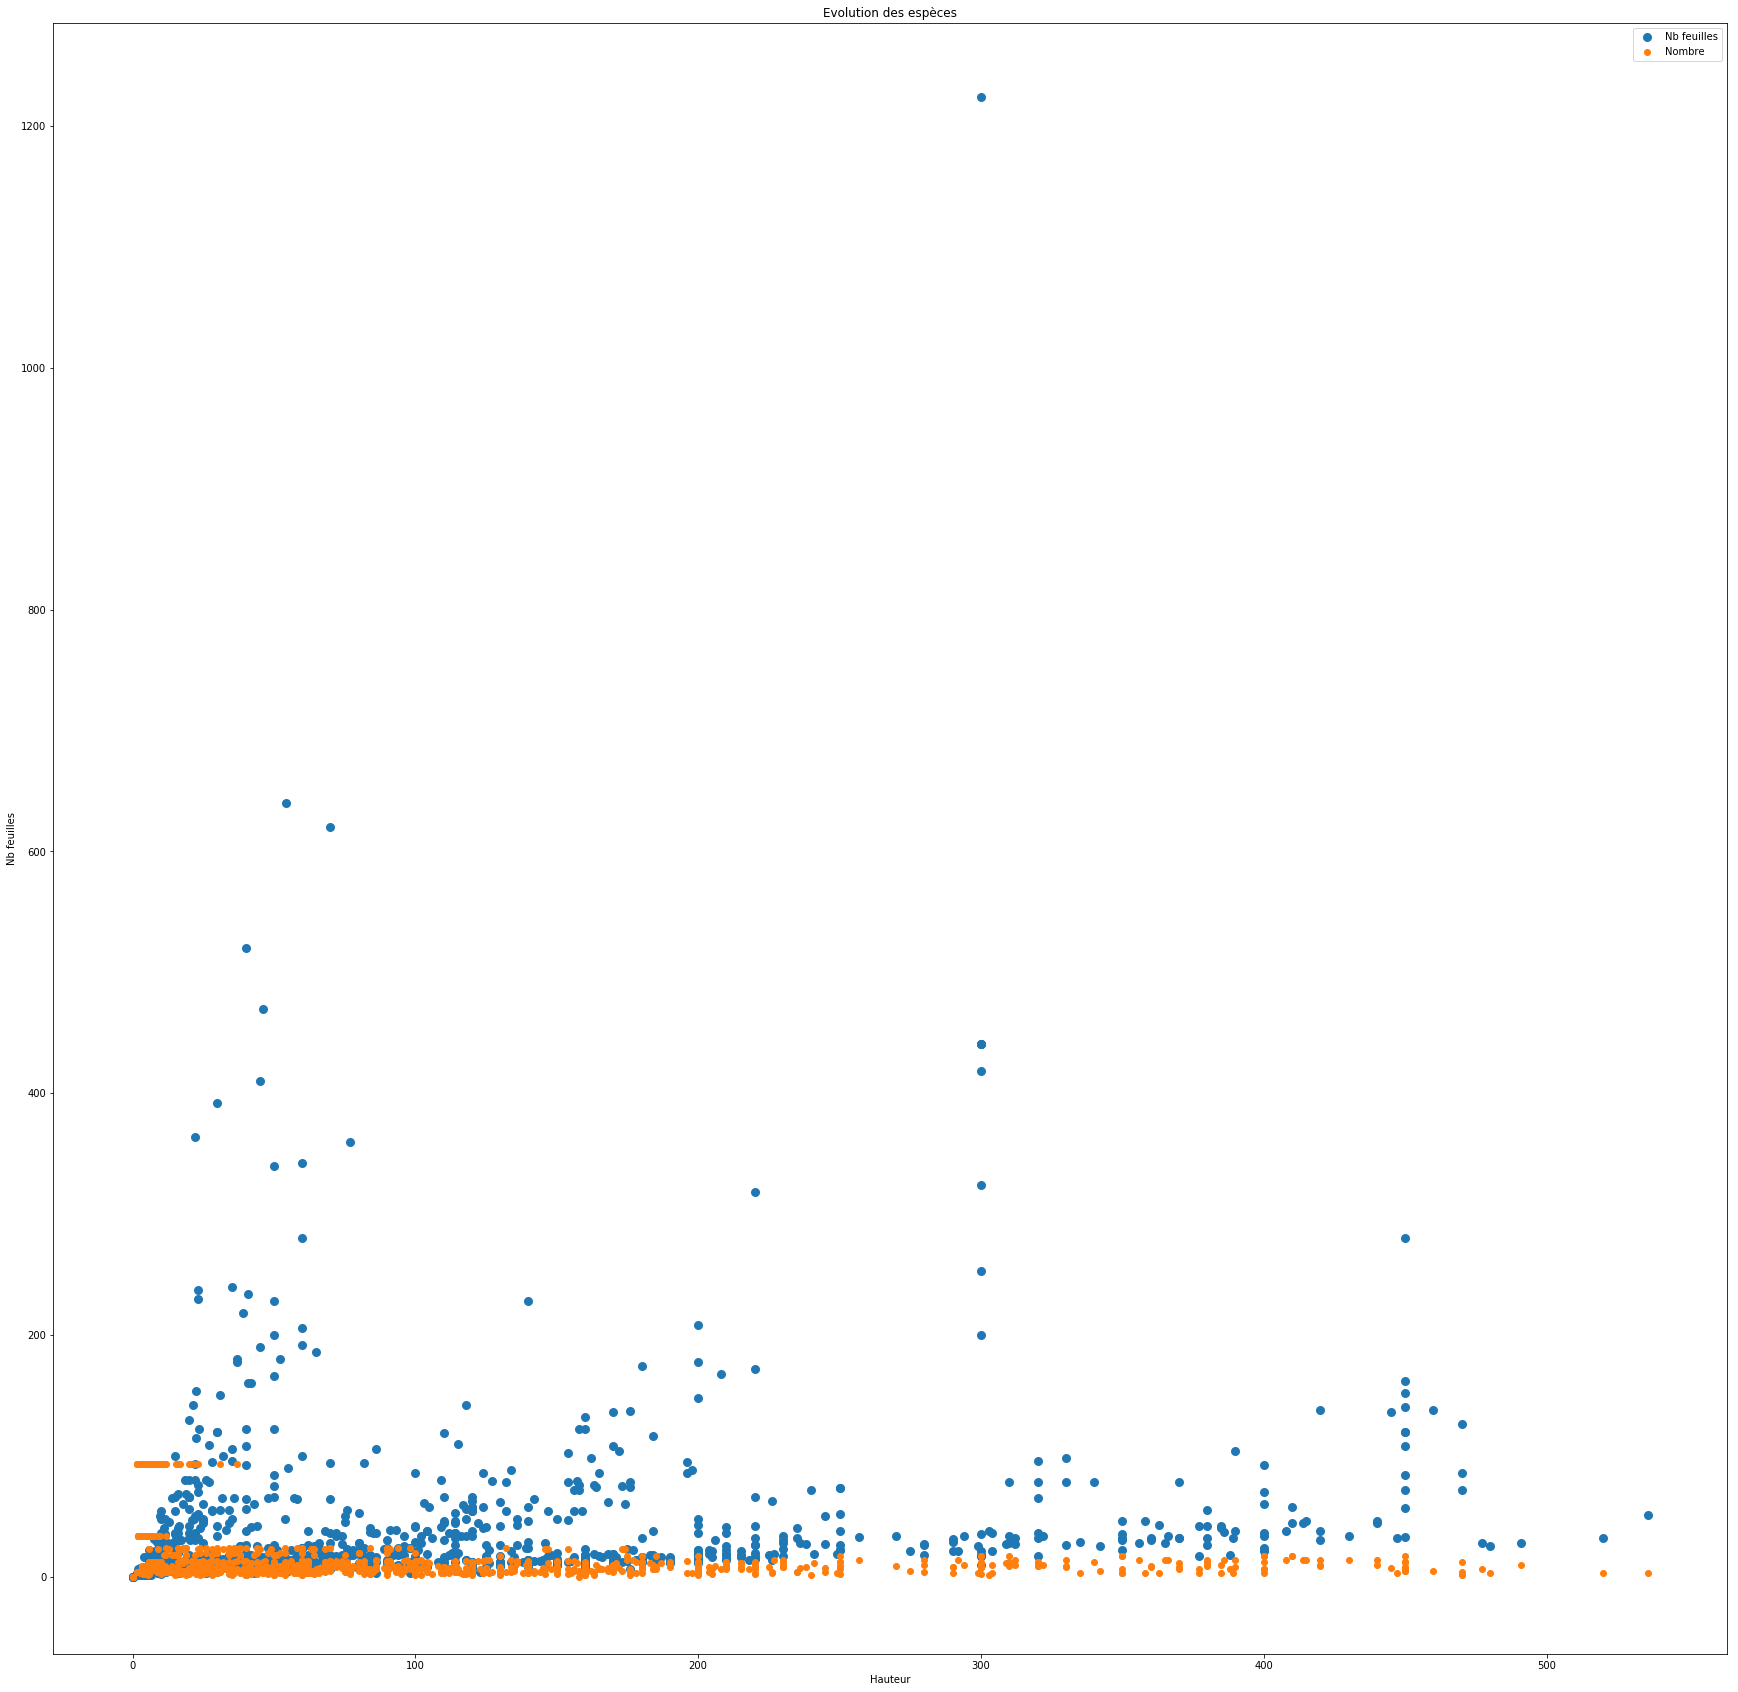

In [20]:
# Convert data to float
df['Hauteur'] = df['Hauteur'].astype(float)
df['Nb feuilles'] = df['Nb feuilles'].astype(float)
df['Nombre'] = df['Nombre'].astype(float)

# Order the dataframe in ascending order of plant height 
df1 = df.sort_values(by = ['Hauteur'],ascending = True)

# Tracer des graphiques
plt.rcParams['figure.figsize'] = (30, 30)

#Nb feuilles en fonction de la hauteur des plantes
plt.scatter( df1['Hauteur'], df1['Nb feuilles'], label='Nb feuilles', linewidth = 3) 
#Nombre des plantes en fonction de la hauteur des plantes
plt.scatter(df1['Hauteur'], df1['Nombre'], label='Nombre') 
#plt.plot(df['Date'], df['Nombre'], label='Nombre') 

plt.xlabel('Hauteur') 
plt.ylabel('Nb feuilles') 
plt.title('Evolution des espèces') 
#plt.grid(True) 
plt.legend()

#fig, axes = plt.subplots(2,2) 
#axes[0,0].hist(df['Hauteur'],bins = 50)



##### visualize the evolution of the plants according to the treatment on each date

Les courbes ci-dessous représentent les nuages de points des variables Hauteur, Nombre et Nombre feuilles en fonction des traitements. Les grahiques sont séparés par date  et les couleurs des points permettent de distinguer les Station.

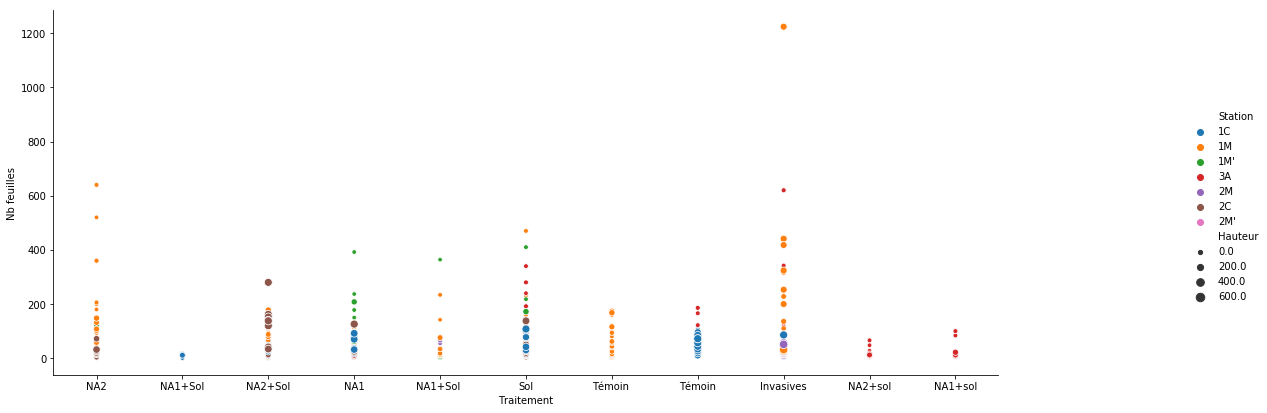

In [25]:
# Nombre de feuilles

g = sns.relplot(x='Traitement', y='Nb feuilles', hue='Station', size='Hauteur', data=df1)
g.fig.set_size_inches(20, 6)
# Hauteur
#sns.relplot(x='Traitement', y='Hauteur', hue='Station', size='Nombre', col='Date', data=df1)

# Nombre d'EEE
#sns.relplot(x='Traitement', y='Nombre', hue='Station', size='Hauteur', col='Date', data=df1)

#NB : il est possible de zoomer en double cliquant sur les figurent

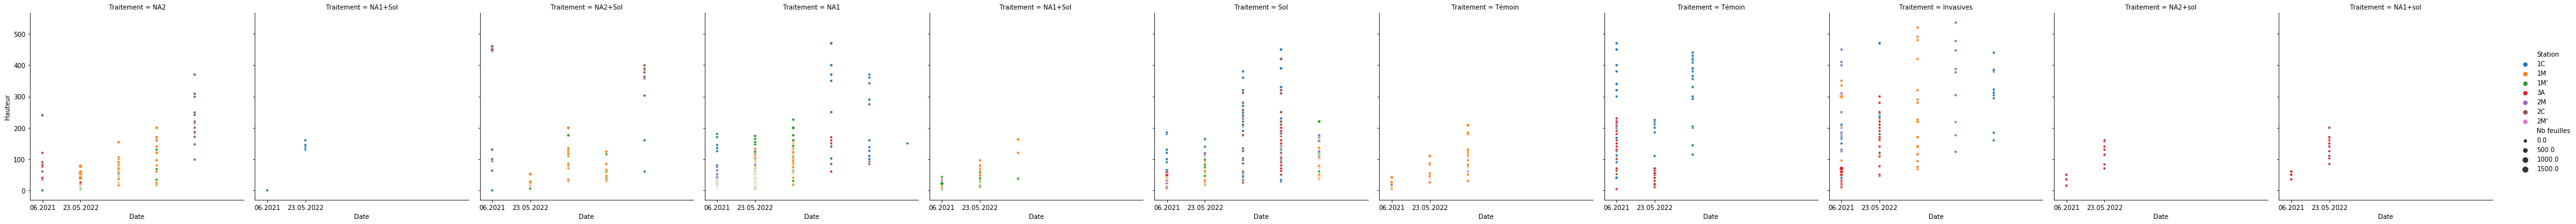

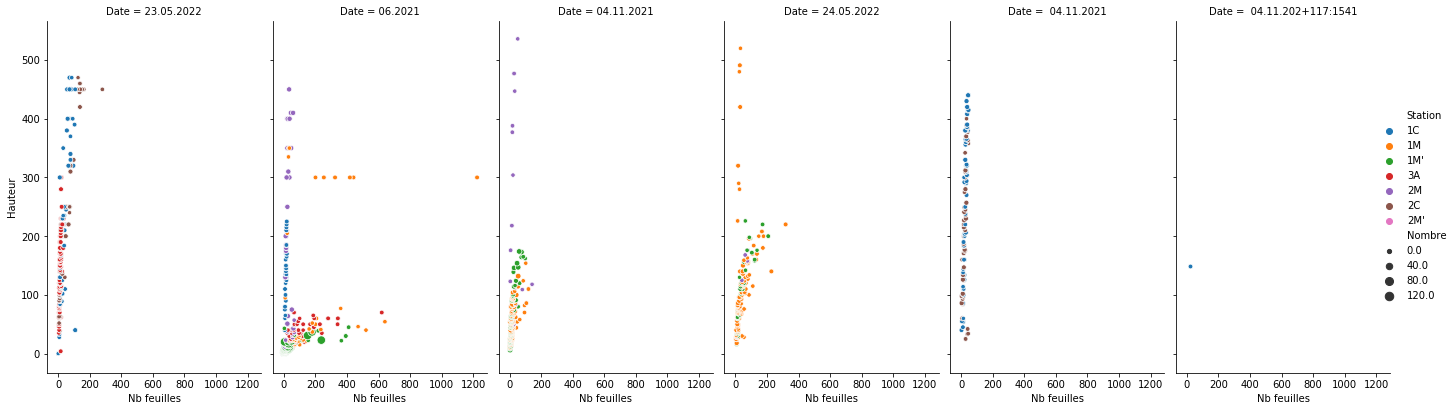

In [21]:
sns.relplot(x='Date', y='Hauteur', hue='Station', size='Nb feuilles', col='Traitement', data=df1)

g = sns.relplot(x='Nb feuilles', y='Hauteur', hue='Station', size='Nombre', col='Date', data=df1, kind="scatter")
g.fig.set_size_inches(20, 6)


#### Etude de la corrélation entre les différentes variables 

The correlation DataFrame is:
              Hauteur  Nb feuilles    Nombre
Hauteur      1.000000     0.178342 -0.300419
Nb feuilles  0.178342     1.000000 -0.140764
Nombre      -0.300419    -0.140764  1.000000 

              Hauteur  Nb feuilles    Nombre
Hauteur      1.000000     0.178342 -0.300419
Nb feuilles  0.178342     1.000000 -0.140764
Nombre      -0.300419    -0.140764  1.000000


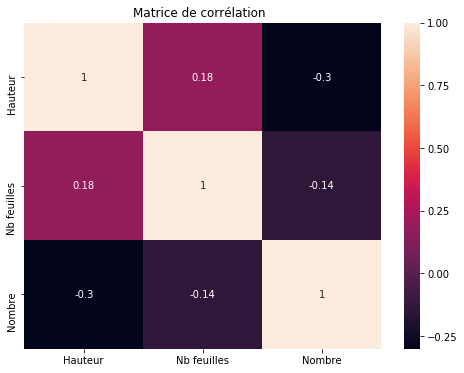

In [10]:
corr_df = df.corr()
print("The correlation DataFrame is:")
print(corr_df, "\n")

corr_df1 = df.corr(method='pearson')
print(corr_df1)
plt.figure(figsize=(8, 6))
plt.title("Matrice de corrélation  ")
sns.heatmap(corr_df, annot=True)
plt.show()

On observe une corrélation négative assez élevé entre les Métrique nombre et Hauteur. Cela suggère que ces deux métriques évoluent dans des directions opposées (les valeurs d'une variable tendent à augmenter lorsque celles de l'autre variable diminuent).

C:\Users\Durel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


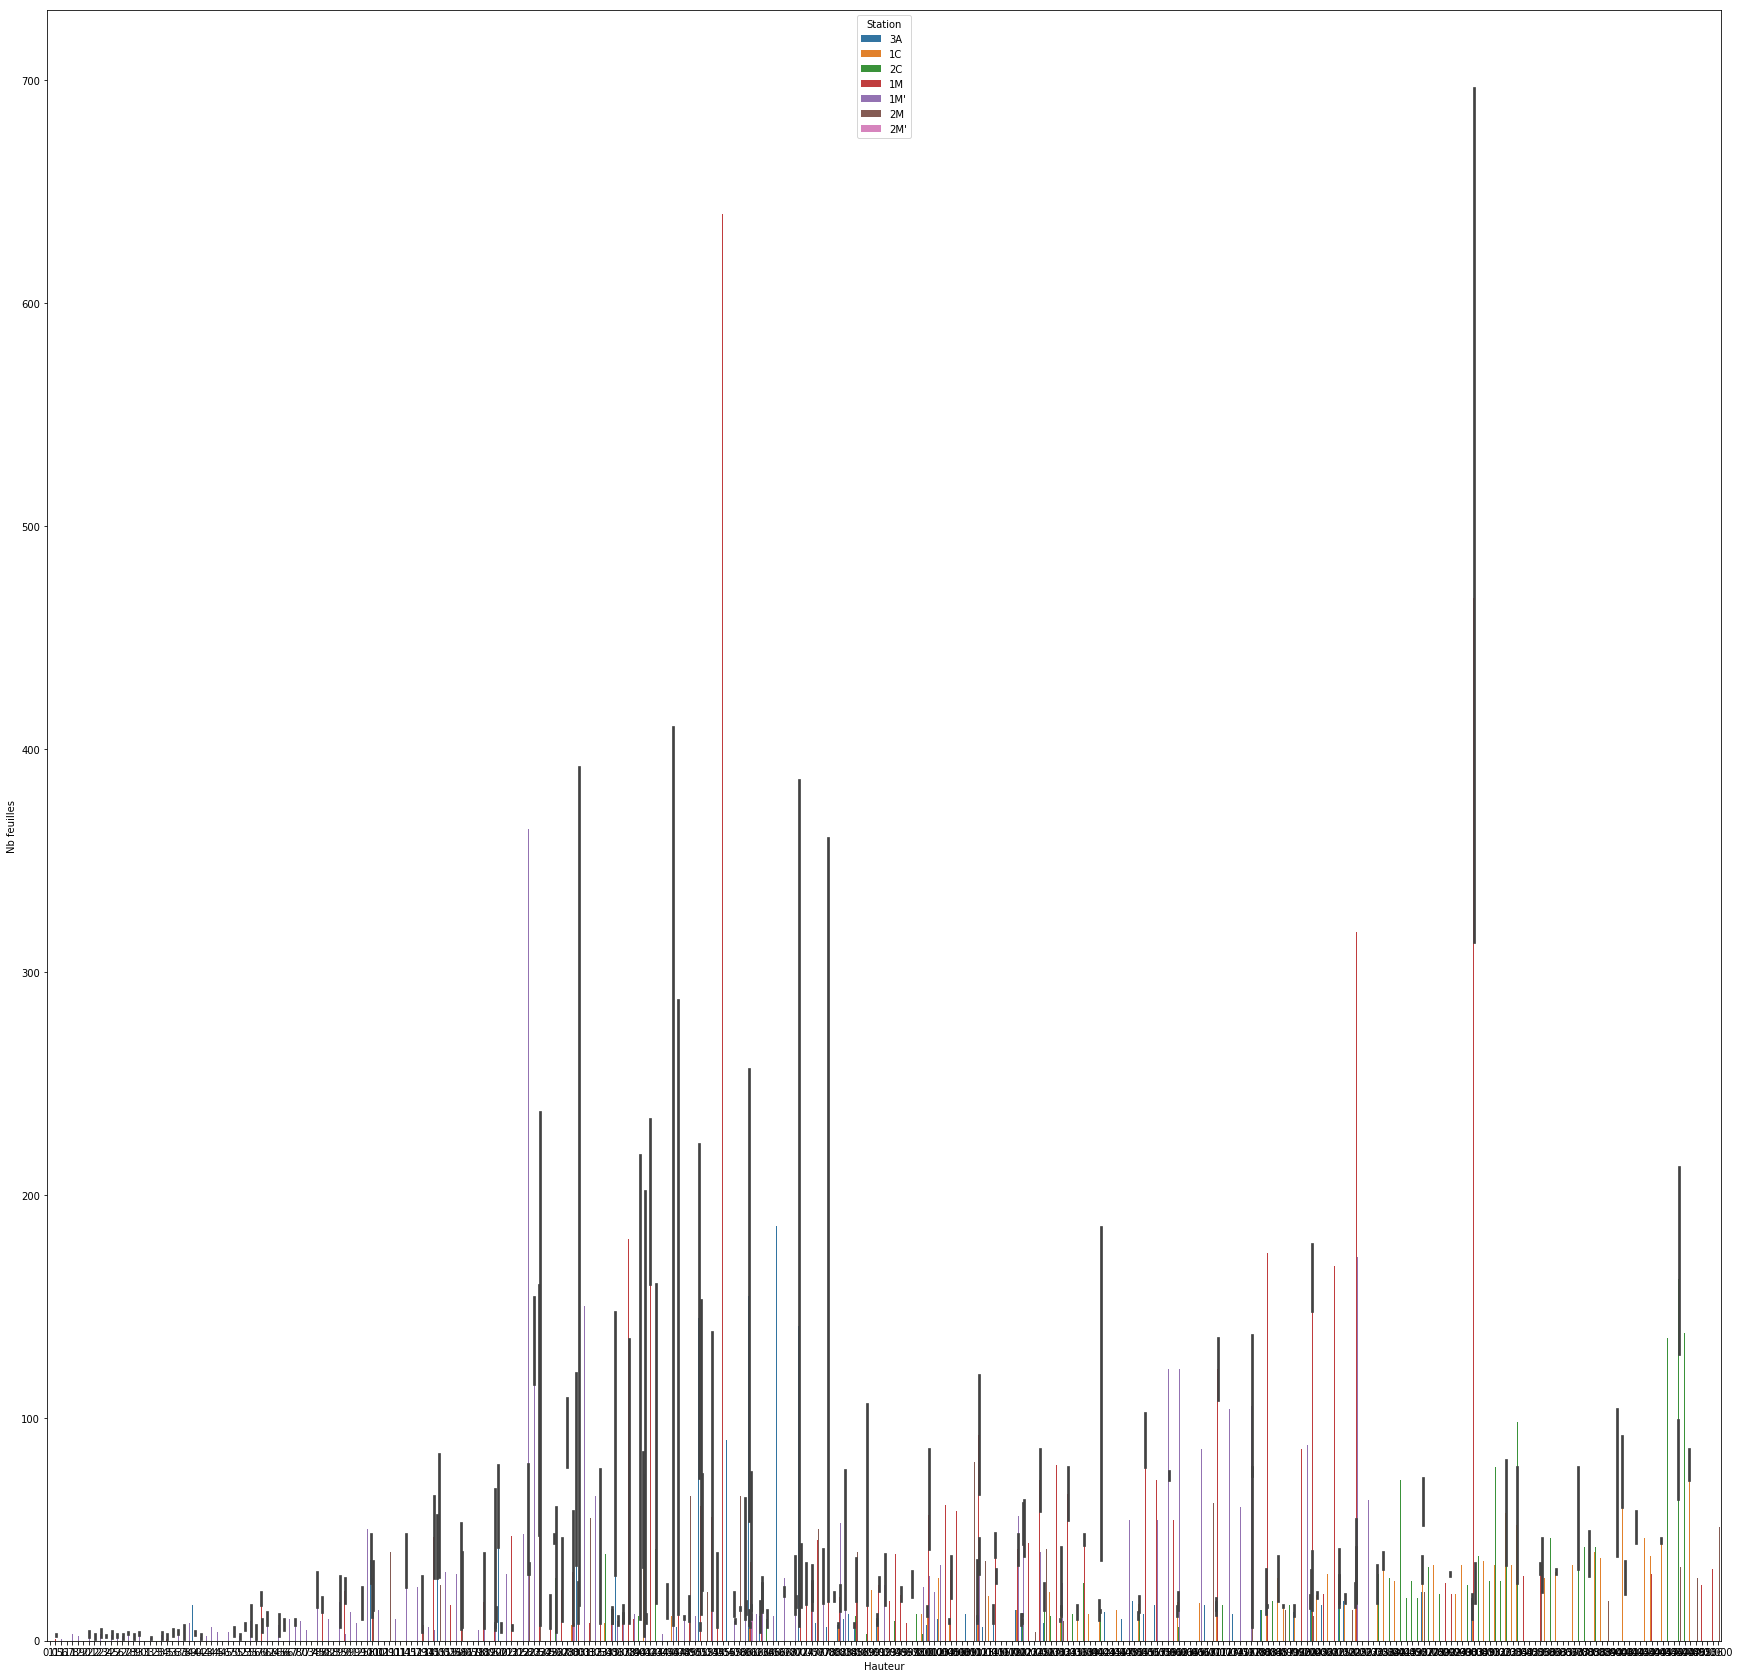

In [11]:
#Divide the dataset

X = df.iloc[ : ,[0,1,2,3]]
Y = df.iloc[ : , [4,5,6]]
X,Y
data['Hauteur'] 

## Diagramme en barre
sns.barplot(x='Hauteur',y='Nb feuilles', data=df,
            hue='Station',linewidth = 5)
plt.show()




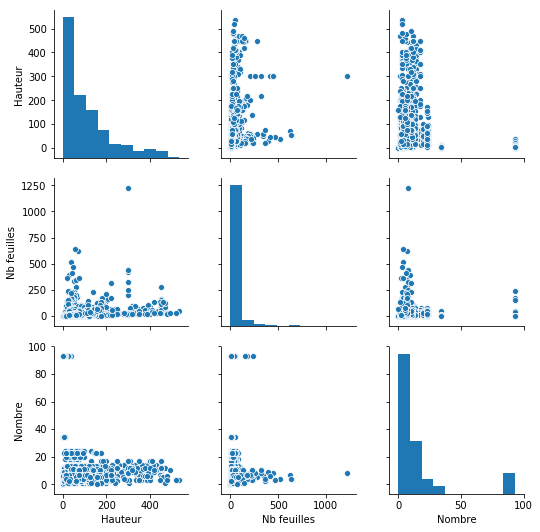

In [12]:
# Graphiques 2D pour chaque paires de colonne
sns.pairplot(df)

C:\Users\Durel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


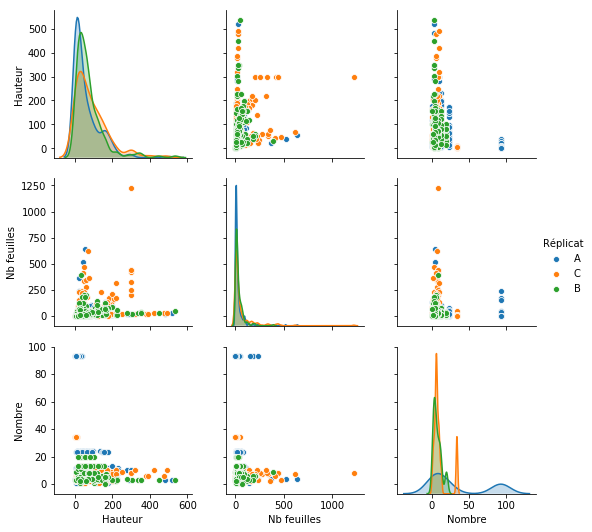

In [13]:
# Graphiques 2D pour chaque paires de colonnes par réplicat
sns.pairplot(df,hue='Réplicat')

C:\Users\Durel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Durel\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Durel\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Durel\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Users\Durel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarnin

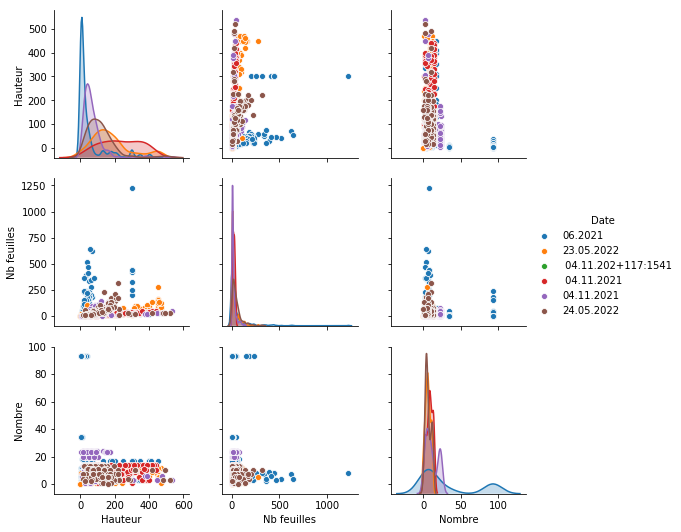

In [14]:
# Graphiques 2D pour chaque paires de colonnes par Date
sns.pairplot(df,hue='Date')

C:\Users\Durel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Durel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Durel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Durel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


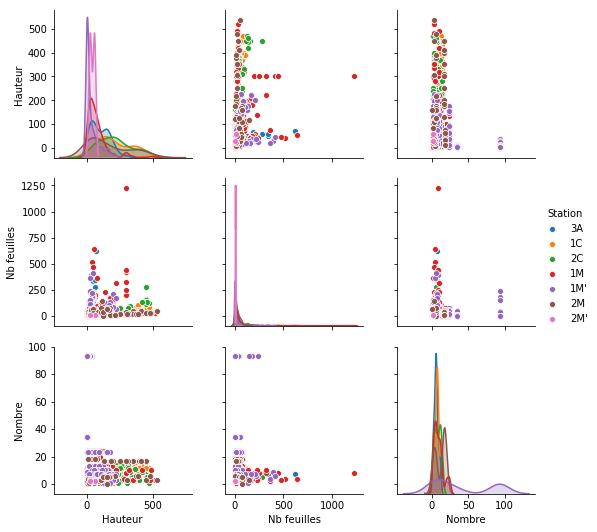

In [15]:
# Graphiques 2D pour chaque paires de colonnes par Station
sns.pairplot(df,hue='Station')

C:\Users\Durel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


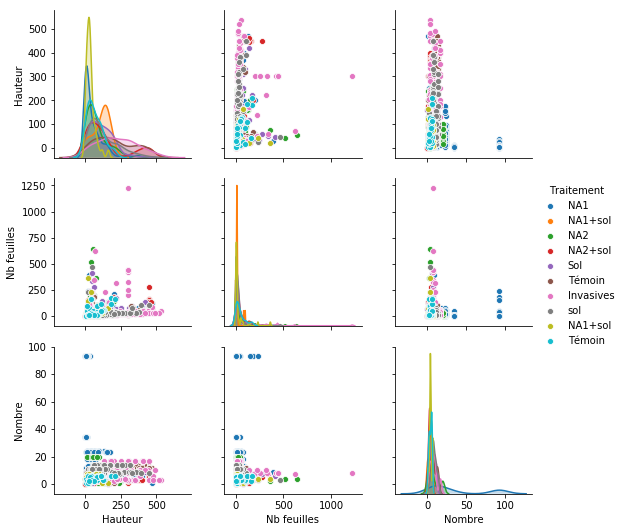

In [16]:
# Graphiques 2D pour chaque paires de colonnes par Traitement
sns.pairplot(df,hue='Traitement')